In [57]:
# Import Splinter, BeautifulSoup, Regular Expression, and Time
from splinter import Browser
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import time
import wget
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Directing the webscrape
executable_path = {'executable_path': 'C:/Users/renie/Desktop/chromedriver.exe'}

browser = Browser('chrome', **executable_path)

In [40]:
#webscrape from the DC open data and download it to a folder
months = ["january","march","april","may","june","july","august","september",\
          "october","november","december"]

download_directory = "2019/"
csv_files = []

for month in months:
    url = "https://opendata.dc.gov/datasets/moving-violations-issued-in-" + month + "-2019/data"
    #print(url)
    browser.visit(url)
    time.sleep(2)

    browser.is_element_present_by_text("Spreadsheet", wait_time=1)
    html = browser.html
    violations_soup = bs(html, 'html.parser')
    #violations_soup
    
    link_info = violations_soup.find("a", id="ember104")
    link = link_info['href']
    filename = link_info['download']
    
    csv_files.append(filename)
    print(link)
    print(filename)
#     print()

    download = wget.download(link, out=download_directory)
    print(download)
    
    time.sleep(10)

NameError: name 'browser' is not defined

In [3]:
#grabing data from the column that i neeed also there is no data on Feb
column_names = ["ISSUE_DATE","VIOLATION_PROCESS_DESC","DRV_LIC_STATE","FINE_AMOUNT"]

y2019_df = pd.DataFrame(columns = column_names)
print(y2019_df)

first_month = "True"
#creating a list of Month since FEB is not showing to make sure it pulls correctly
months = ["January","March","April","May","June","July","August","September",\
          "October","November","December"]

csv_files = []
#for loop to read each file
for month in months:
    filename = "Moving_Violations_Issued_in_" + month + "_2019.csv"
    csv_files.append(filename)

# in each file i am grabbing the data from the columns and 11 files and creating a new file to use for the codes ill need to vreate below.
for file in csv_files:
    file_path = "2019/" + file
    print(file_path)
    
    month_df = pd.read_csv(file_path)
    #for loop to only get drivers that have ID from VA, MD, DC and drop the rest
    temp_df = month_df.loc[:,["ISSUE_DATE","VIOLATION_PROCESS_DESC","DRV_LIC_STATE","FINE_AMOUNT"]]
    temp_df = temp_df[temp_df['DRV_LIC_STATE'].isin(["DC","MD","VA"])==True]
    temp_df.dropna(subset=["DRV_LIC_STATE"]) 
    
    if first_month == "True":
        y2019_df = temp_df 
        first_month = "False"
    else:    
        csv_df = pd.concat([y2019_df, temp_df])
        y2019_df = csv_df
        #break
#creating the new excel that will be used to answer all the data.    
y2019_df.to_csv("2019/final.csv")      

Empty DataFrame
Columns: [ISSUE_DATE, VIOLATION_PROCESS_DESC, DRV_LIC_STATE, FINE_AMOUNT]
Index: []
2019/Moving_Violations_Issued_in_January_2019.csv


C:\Users\renie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2019/Moving_Violations_Issued_in_March_2019.csv
2019/Moving_Violations_Issued_in_April_2019.csv
2019/Moving_Violations_Issued_in_May_2019.csv
2019/Moving_Violations_Issued_in_June_2019.csv
2019/Moving_Violations_Issued_in_July_2019.csv
2019/Moving_Violations_Issued_in_August_2019.csv
2019/Moving_Violations_Issued_in_September_2019.csv
2019/Moving_Violations_Issued_in_October_2019.csv
2019/Moving_Violations_Issued_in_November_2019.csv
2019/Moving_Violations_Issued_in_December_2019.csv


In [53]:
#adding year and month to dataframe
y2019_df["YEAR"] = y2019_df['ISSUE_DATE'].str.split('/').str[0]
y2019_df["MONTH"] = y2019_df['ISSUE_DATE'].str.split('/').str[1]

y2019_df.sample(5)

,ISSUE_DATE,VIOLATION_PROCESS_DESC,DRV_LIC_STATE,FINE_AMOUNT,YEAR,MONTH
8791,2019/05/01 04:00:00+00,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,DC,150.0,2019,05
48332,2019/04/11 04:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0,2019,04
2007,2019/09/01 04:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0,2019,09
591,2019/06/02 04:00:00+00,COMMERCIAL VEHICLE OPERATING WHILE IN PARK,MD,25.0,2019,06
15470,2019/06/20 04:00:00+00,TURN RIGHT ON RED WITHOUT COMPLETE STOP,DC,100.0,2019,06


### Question 6 - Total amount of issuing violations by State and Month

In [5]:
#groupby to see the amount of fine issued by state
amount = y2019_df.groupby("DRV_LIC_STATE")['FINE_AMOUNT'].sum().map("${:,.1f}".format)

amount.to_frame()

amount.reset_index()

,DRV_LIC_STATE,FINE_AMOUNT
0,DC,"$25,105,850.0"
1,MD,"$3,502,470.0"
2,VA,"$1,287,157.0"


Text(0.0, 1.0, 'Total Fines Issued to Drivers from DC, MD & VA (2019)')

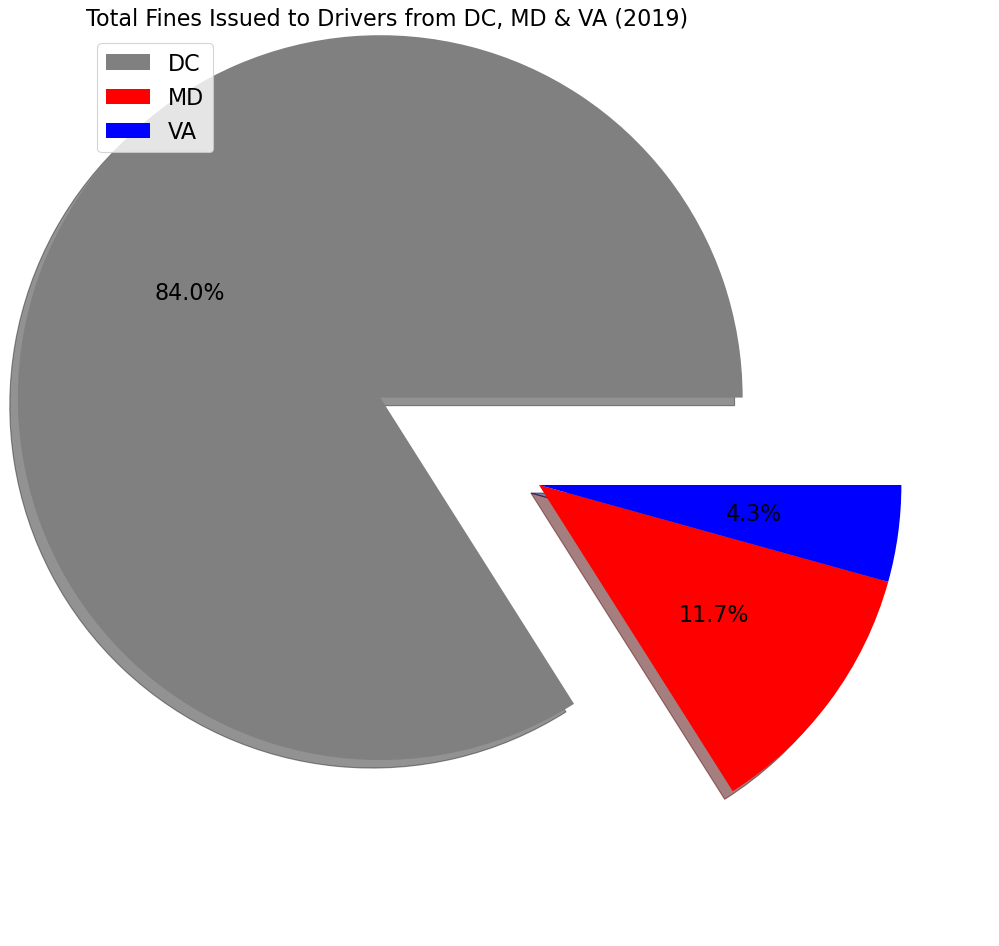

In [48]:
#creating a matplot pie chart that discribes the info above in %
tasks = [25105850.0, 3502470.0, 1287157.0]
sizes = [220, 95, 80]
colors = ['gray', 'red', 'blue']
explode = (0.5, 0, 0)
plt.figure(figsize=(15,15), dpi=80)
plt.pie(tasks, explode=explode, shadow=True, colors=colors, autopct='%.1f%%' )
plt.legend(labels= ['DC','MD', 'VA'],loc=2, fontsize=20)
plt.title('Total Fines Issued to Drivers from DC, MD & VA (2019)',loc="left", fontsize=20)


(100000.0, 30000000.0)

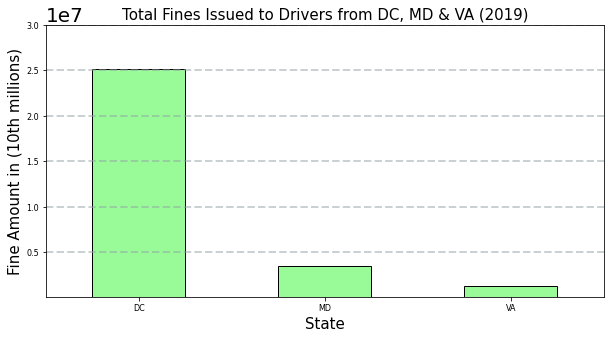

In [85]:
# creating a bar chart with the data about fine amount to show $ value
fine = [25105850.0, 3502470.0, 1287157.0]
state= ["DC", "MD", "VA"]
df =pd.DataFrame({'state': state, 'fine': fine})
df.plot.bar(x= 'state', y = 'fine', rot=0, legend=False, color = 'palegreen', edgecolor = 'black', figsize=(10,5), fontsize= 8)
plt.ylabel('Fine Amount in (10th millions)', fontsize=15)
plt.xlabel('State', fontsize= 15)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
plt.title('Total Fines Issued to Drivers from DC, MD & VA (2019)', fontsize=15,loc='center')
plt.ylim((100000,30000000))


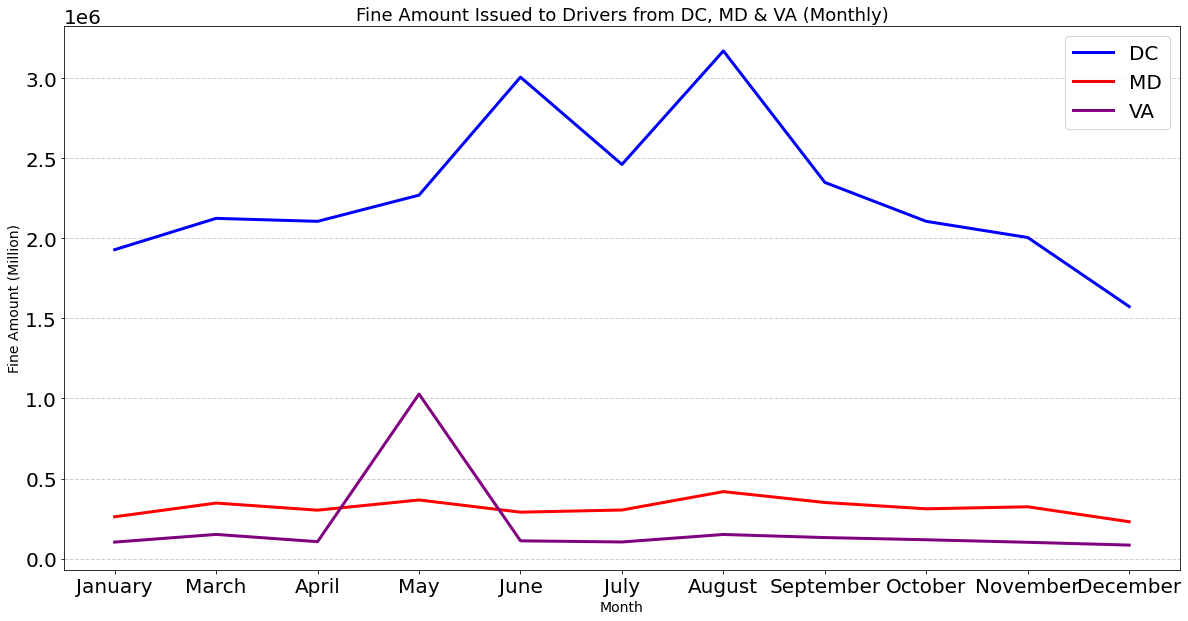

In [49]:
#This data shows the fine amount by month and state with the data colected below
x_axis = ('January', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
x_axis
District = [1929450.0, 2125015.0, 2106375.0, 2270000.0, 3007080.0, 2461670.0, 3170890.0, 2349595.0, 2106245.0, 2005436.0, 1574094.0]
Maryland = [261086.0, 346831.0, 302362.0, 365972.0, 289874.0, 303418.0, 418166.0, 350287.0, 310869.0, 323488.0, 230117.0]
Virginia = [103030.0, 150855.0, 105652.0, 1027890.0, 110821.0, 103686.0, 150490.0, 131241.0, 117500.0, 101750.0, 84242.0]

plt.figure(figsize=(20, 10))
first = plt.plot(x_axis, District, linewidth=3, color='blue', label='DC')
second = plt.plot(x_axis, Maryland, linewidth=3, color='red', label='MD')
third = plt.plot(x_axis, Virginia, linewidth=3, color='purple', label='VA')

plt.legend(loc='best')
plt.grid(color='#95A5A6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Fine Amount (Million)', fontsize=14)
plt.title('Fine Amount Issued to Drivers from DC, MD & VA (Monthly)', fontsize=18)
plt.show()


In [9]:
#wanted to see the breakdown of each state by month, used the columns to group by and ger the amount in $
total_amount = y2019_df.groupby(["DRV_LIC_STATE", "MONTH"])['FINE_AMOUNT'].sum().map("${:,.1f}".format)

total_amount.to_frame()

FINE_AMOUNT
DRV_LIC_STATE MONTH              
DC            01     $1,929,450.0
              03     $2,125,015.0
              04     $2,106,375.0
              05     $2,270,000.0
              06     $3,007,080.0
              07     $2,461,670.0
              08     $3,170,890.0
              09     $2,349,595.0
              10     $2,106,245.0
              11     $2,005,436.0
              12     $1,574,094.0
MD            01       $261,086.0
              03       $346,831.0
              04       $302,362.0
              05       $365,972.0
              06       $289,874.0
              07       $303,418.0
              08       $418,166.0
              09       $350,287.0
              10       $310,869.0
              11       $323,488.0
              12       $230,117.0
VA            01       $103,030.0
              03       $150,855.0
              04       $105,652.0
              05       $127,890.0
              06       $110,821.0
              07       $103,686.0
              08       $150,490.0
              09       $131,241.0
              10       $117,500.0
              11       $101,750.0
              12        $84,242.0

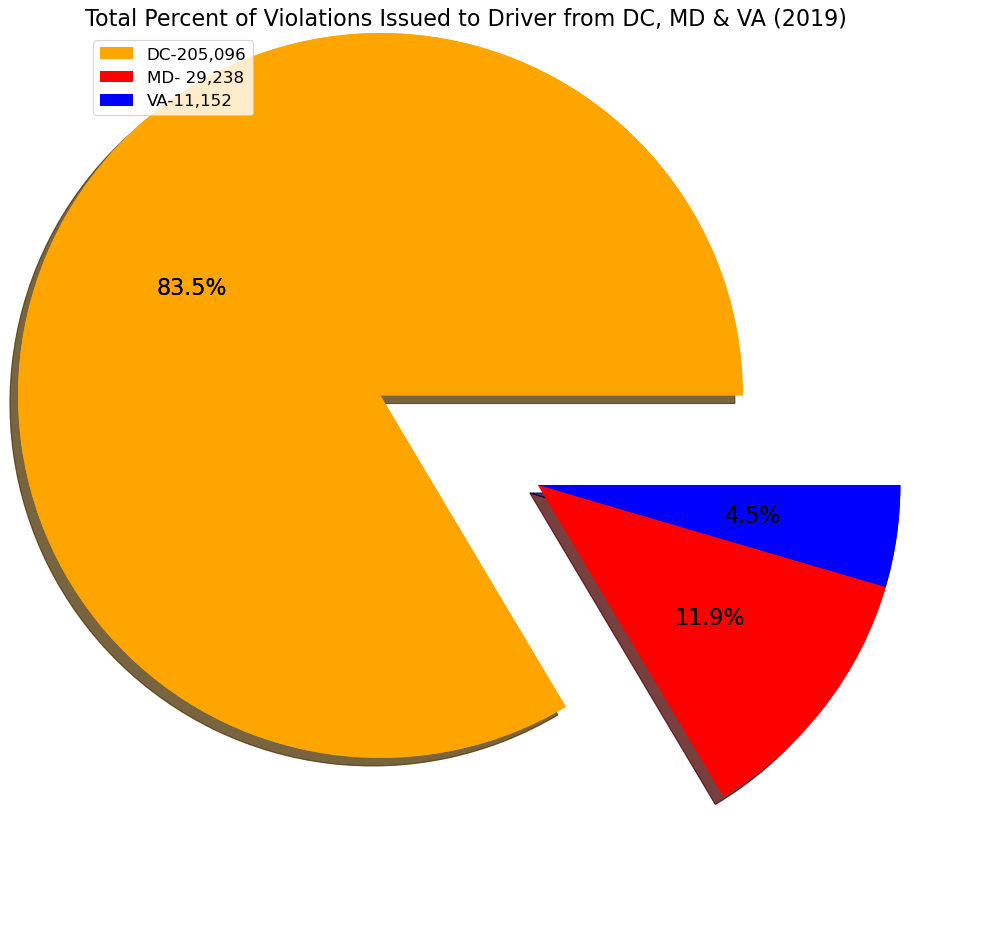

In [47]:
#using the data below we created a pie chart that shows the amount of violation that each state has
plt.rcParams['font.size'] = 20

tasks = [205096, 29238, 11152]
sizes = [220, 95, 80]
colors = ['orange', 'red', 'blue']
explode = (0.5, 0, 0)




plt.figure(figsize=(15,15), dpi=80)
plt.pie(tasks, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%')
plt.legend(labels= ['DC-205,096','MD- 29,238', 'VA-11,152'],loc=2, fontsize= 15)
plt.title('Total Percent of Violations Issued to Driver from DC, MD & VA (2019)',loc="left", fontsize=20)




In [11]:
#need to grab the amount of violation each state got for the year 2019
violation_amount = y2019_df.groupby("DRV_LIC_STATE")['DRV_LIC_STATE'].count()
violation_amount.to_frame()

,DRV_LIC_STATE
DRV_LIC_STATE,
DC,205096
MD,29238
VA,11152


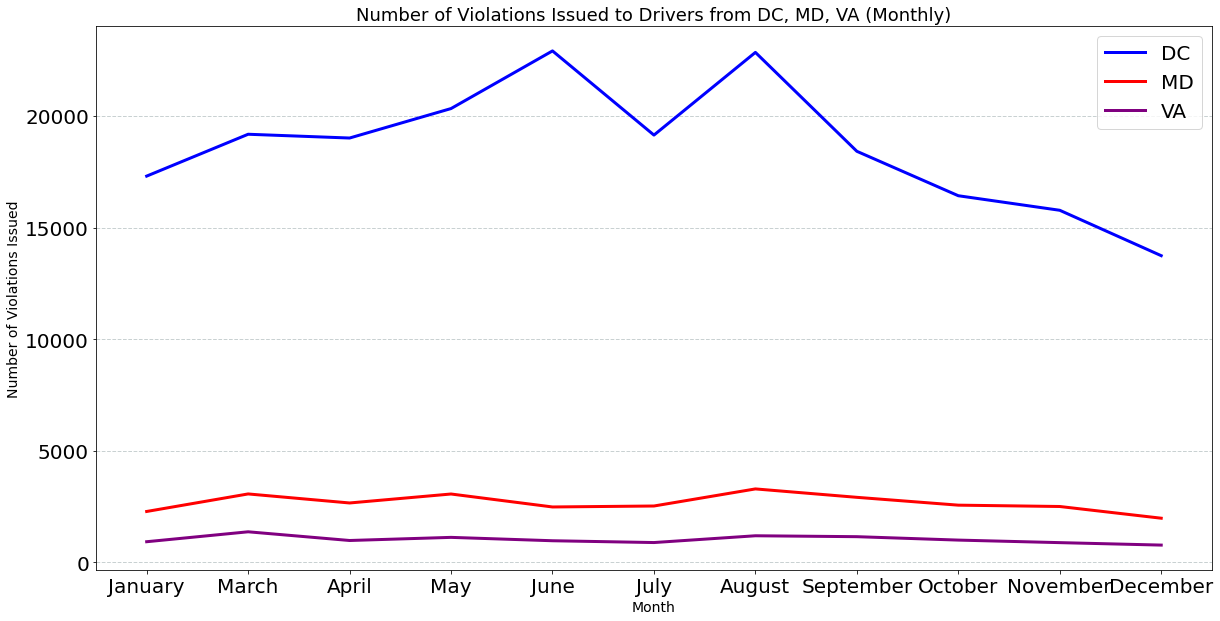

In [50]:
#using the data below needed to break it down in month and state for the amount of fines received in 2019
x_axis = ('January', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
x_axis
District = [17305 ,19181, 19012, 20333, 22917, 19144, 22851, 18417, 16425, 15773, 13738]
Maryland = [2272, 3058, 2653, 3055, 2474, 2517, 3283, 2906, 2555, 2495, 1970]
Virginia = [916, 1361, 971, 1111, 960, 879, 1183, 1142, 989, 875, 765]

plt.figure(figsize=(20, 10))
first = plt.plot(x_axis, District, linewidth=3, color='blue', label='DC')
second = plt.plot(x_axis, Maryland, linewidth=3, color='red', label='MD')
third = plt.plot(x_axis, Virginia, linewidth=3, color='purple', label='VA')

plt.legend(loc='best')
plt.grid(color='#95A5A6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Violations Issued', fontsize=14)
plt.title('Number of Violations Issued to Drivers from DC, MD, VA (Monthly)', fontsize=18)
plt.show()

In [8]:
#gather the violations each state driver recieved in each month, using the groupby and count method 
violation_amount = y2019_df.groupby(["DRV_LIC_STATE", "MONTH"])['DRV_LIC_STATE'].count()
violation_amount.to_frame()


DRV_LIC_STATE
DRV_LIC_STATE MONTH               
DC            01             17305
              03             19181
              04             19012
              05             20333
              06             22917
              07             19144
              08             22851
              09             18417
              10             16425
              11             15773
              12             13738
MD            01              2272
              03              3058
              04              2653
              05              3055
              06              2474
              07              2517
              08              3283
              09              2906
              10              2555
              11              2495
              12              1970
VA            01               916
              03              1361
              04               971
              05              1111
              06               960
              07               879
              08              1183
              09              1142
              10               989
              11               875
              12               765

In [47]:
# finding out the type of violations and type to be able to andwer the next question
y2019_df["VIOLATION_PROCESS_DESC"].value_counts()

SPEED 11-15 MPH OVER THE SPEED LIMIT                131347
SPEED 16-20 MPH OVER THE SPEED LIMIT                 21434
PASSING STOP SIGN WITHOUT COMING TO A FULL STOP      16890
FAIL TO STOP PER REGULATIONS FACING RED SIGNAL       12516
FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE            5343
                                                     ...  
FAILURE TO YEILD ROW  TO TRANSIT BUS                     1
VIOLATION OF SNOW EMERGENCY PARKING REGULATIONS          1
FAIL TO PROCEED WITH CAUTION THROUGH AN INCIDENT         1
PASS ON A HILL                                           1
INTERFERE WITH A TRAFFIC SIGNAL DEVICE                   1
Name: VIOLATION_PROCESS_DESC, Length: 251, dtype: int64

pandas.core.series.Series

In [33]:
#as we have done for fine amount in sum and in count now i need to show the violation type per month in each state and create into a data frame
violation_df = y2019_df.groupby(["DRV_LIC_STATE","VIOLATION_PROCESS_DESC"])['ISSUE_DATE'].count().to_frame()

violation_df.rename(columns = {'ISSUE_DATE':'RECORD_COUNT'}, inplace=True)

violation_df.sort_values('RECORD_COUNT', ascending=False, inplace=True)

violation_df

RECORD_COUNT
DRV_LIC_STATE VIOLATION_PROCESS_DESC                                         
DC            SPEED 11-15 MPH OVER THE SPEED LIMIT                     128150
              SPEED 16-20 MPH OVER THE SPEED LIMIT                      19067
              PASSING STOP SIGN WITHOUT COMING TO A FULL STOP           13975
              FAIL TO STOP PER REGULATIONS FACING RED SIGNAL            10269
              TURN RIGHT ON RED WITHOUT COMPLETE STOP                    4746
...                                                                       ...
MD            UNSAFE BUMPER                                                 1
DC            UNSAFE BUMPER                                                 1
VA            LOAD OVER FENDER(S)                                           1
              LICENSE/PERMIT, DISPLAY OR USING ANOTHER PERSON'S             1
MD            LESS THAN 18 YRS OLD PASSENGER RESTRAINT VIOL                 1

[612 rows x 1 columns]

In [36]:
#looking at the top 5 violation for 2019 for DC
top5_dc = violation_df.loc['DC'].sort_values('RECORD_COUNT', ascending=False).head(5)
top5_dc['STATE'] = 'DC'
top5_dc

,RECORD_COUNT,STATE
VIOLATION_PROCESS_DESC,,
SPEED 11-15 MPH OVER THE SPEED LIMIT,128150,DC
SPEED 16-20 MPH OVER THE SPEED LIMIT,19067,DC
PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,13975,DC
FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,10269,DC
TURN RIGHT ON RED WITHOUT COMPLETE STOP,4746,DC


In [37]:
#looking for the top 5 violation for 2019 in MD
top5_md = violation_df.loc['MD'].sort_values('RECORD_COUNT', ascending=False).head(5)
top5_md['STATE'] = 'MD'
top5_md

,RECORD_COUNT,STATE
VIOLATION_PROCESS_DESC,,
SPEED 11-15 MPH OVER THE SPEED LIMIT,2418,MD
PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,2140,MD
DISOBEY TRAFFIC CONTROL DEVICE,1959,MD
FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,1888,MD
SPEED 16-20 MPH OVER THE SPEED LIMIT,1776,MD


In [38]:
#looking for the top 5 violation for 2019 in VA
top5_va = violation_df.loc['VA'].sort_values('RECORD_COUNT', ascending=False).head(5)
top5_va['STATE'] = 'VA'
top5_va

,RECORD_COUNT,STATE
VIOLATION_PROCESS_DESC,,
FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,838,VA
SPEED 11-15 MPH OVER THE SPEED LIMIT,779,VA
PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,775,VA
FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,639,VA
SPEED 16-20 MPH OVER THE SPEED LIMIT,591,VA


In [10]:
# show all rows in a DataFrame
pd.set_option('display.max_rows', None)

In [10]:
# looking at the breakdown of each violation for each month in each state.
violations = y2019_df.groupby(["DRV_LIC_STATE", "YEAR" , "MONTH"])['VIOLATION_PROCESS_DESC'].value_counts()

violations.to_frame()

VIOLATION_PROCESS_DESC
DRV_LIC_STATE YEAR MONTH VIOLATION_PROCESS_DESC                                                 
DC            2019 01    SPEED 11-15 MPH OVER THE SPEED LIMIT                              11157
                         SPEED 16-20 MPH OVER THE SPEED LIMIT                               1586
                         FAIL TO STOP PER REGULATIONS FACING RED SIGNAL                      937
                         PASSING STOP SIGN WITHOUT COMING TO A FULL STOP                     870
                         TURN RIGHT ON RED WITHOUT COMPLETE STOP                             420
...                                                                                          ...
VA            2019 12    PASSING IN AN INTERSECTION                                            1
                         PERMIT USE OF EXPIRED TAGS                                            1
                         POORLY ILLUMINATED TAGS                                               1
                         SEAT BELT REGULATION MULTIPLE VIOLATIONS                              1
                         VIOLATION OF RESTRICTION ON LEARNER'S PERMIT                          1

[3910 rows x 1 columns]